# Partial-Autocorrelation-Plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/data set/southern-oscillations.csv")
df

,Southern,Osc. Year&Month,Year,Month
0,-0.7,1955.04,1955,1
1,1.3,1955.13,1955,2
2,0.1,1955.21,1955,3
3,-0.9,1955.29,1955,4
4,0.8,1955.38,1955,5
...,...,...,...,...
451,0.0,1992.63,1992,8
452,0.0,1992.71,1992,9
453,-1.9,1992.79,1992,10
454,-0.9,1992.88,1992,11


In [4]:
# !pip install pandas matplotlib statsmodels

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
# df.set_index('Osc. Year&Month', inplace=True)

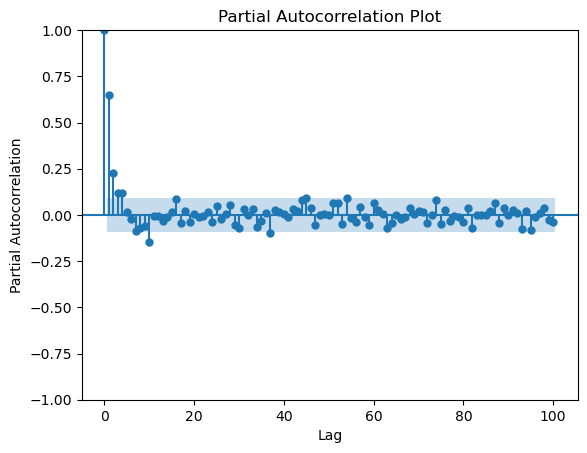

In [7]:
# Plot Partial Autocorrelation
plot_pacf(df['Southern'], alpha=0.05, lags=100, use_vlines=True)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.show()

In [8]:
time_period = df['Month'].values
reading = df['Southern'].values

In [9]:
bar_x = np.mean(reading)
C_0 = np.mean((reading - bar_x)**2)

In [10]:
N = len(reading)
lags = np.arange(1, N)

In [11]:
C_k_values = np.zeros_like(lags, dtype=float)
lags_values = np.zeros_like(lags, dtype=int)

for i, k in enumerate(lags):
    lags_values[i] = k
    C_k_values[i] = np.mean((reading[:-k] - bar_x) * (reading[k:] - bar_x))

# Create a DataFrame for the results
result_table = pd.DataFrame({
    'Lag (k)': lags_values,
    'Autocovariance (C_k)': C_k_values
})

# Add C_0 to the table
c0_row = pd.DataFrame({'Lag (k)': [0], 'Autocovariance (C_k)': [C_0]})
result_table = pd.concat([c0_row, result_table], ignore_index=True)


# Display the results
print("Mean (bar_x):", bar_x)
print("C_0:", C_0)
print("\nAutocovariance Table:")
print(result_table)

Mean (bar_x): -0.10350877192982456
C_0: 1.1877508464142814

Autocovariance Table:
     Lag (k)  Autocovariance (C_k)
0          0              1.187751
1          1              0.772242
2          2              0.657330
3          3              0.584732
4          4              0.556584
..       ...                   ...
451      451             -0.109602
452      452             -0.487882
453      453             -0.083029
454      454             -0.461742
455      455              0.594398

[456 rows x 2 columns]


In [12]:
autocovariance_table = pd.DataFrame({
    'Lag (k)': lags_values,
    'Autocovariance (C_k)': C_k_values
})

In [13]:
# Add C_0 to the autocovariance table
c0_row = pd.DataFrame({'Lag (k)': [0], 'Autocovariance (C_k)': [C_0]})
autocovariance_table = pd.concat([c0_row, autocovariance_table], ignore_index=True)

In [14]:
acf_values = autocovariance_table['Autocovariance (C_k)'] / C_0

# Create a DataFrame for the ACF results
acf_table = pd.DataFrame({
    'Lag (k)': autocovariance_table['Lag (k)'],
    'Autocorrelation (ACF_k)': acf_values
})

In [15]:
# Display the results
# print("Autocovariance Table:")
# print(autocovariance_table)

print("\nAutocorrelation Function (ACF) Table:")
print(acf_table)


Autocorrelation Function (ACF) Table:
     Lag (k)  Autocorrelation (ACF_k)
0          0                 1.000000
1          1                 0.650171
2          2                 0.553424
3          3                 0.492302
4          4                 0.468603
..       ...                      ...
451      451                -0.092277
452      452                -0.410762
453      453                -0.069904
454      454                -0.388753
455      455                 0.500440

[456 rows x 2 columns]


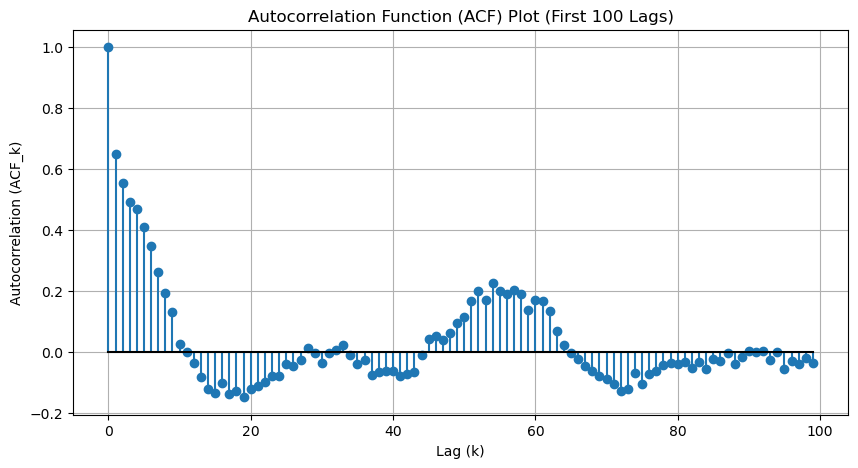

In [16]:
plt.figure(figsize=(10, 5))
plt.stem(acf_table['Lag (k)'][:100], acf_table['Autocorrelation (ACF_k)'][:100], basefmt="k-")
plt.title('Autocorrelation Function (ACF) Plot (First 100 Lags)')
plt.xlabel('Lag (k)')
plt.ylabel('Autocorrelation (ACF_k)')
plt.grid(True)
plt.show()

# Run-Sequence Plot

In [17]:
df2 = pd.read_csv("D:/data set/MAVRO.csv")
df2.head()

,Transmittance
0,2.0018
1,2.0017
2,2.0018
3,2.0019
4,2.0018


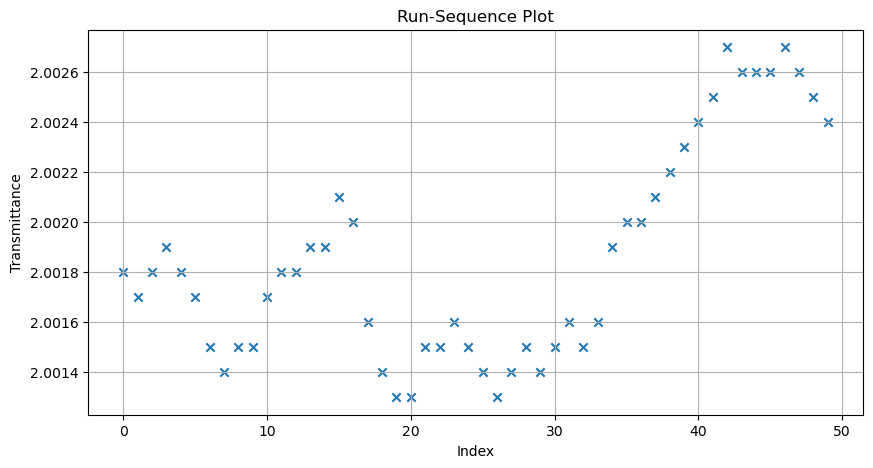

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(df2.index, df2['Transmittance'], marker='x')
plt.xlabel('Index')
plt.ylabel('Transmittance')
plt.title('Run-Sequence Plot')
plt.grid(True)
plt.show()

# Autocorrelation Plot

In [19]:
df3 = pd.read_csv("D:/data set/FLICKER.csv")
df3.head()

,Y
0,-0.000282
1,-0.001071
2,0.001569
3,-0.000156
4,0.003643


In [20]:
from pandas.plotting import autocorrelation_plot

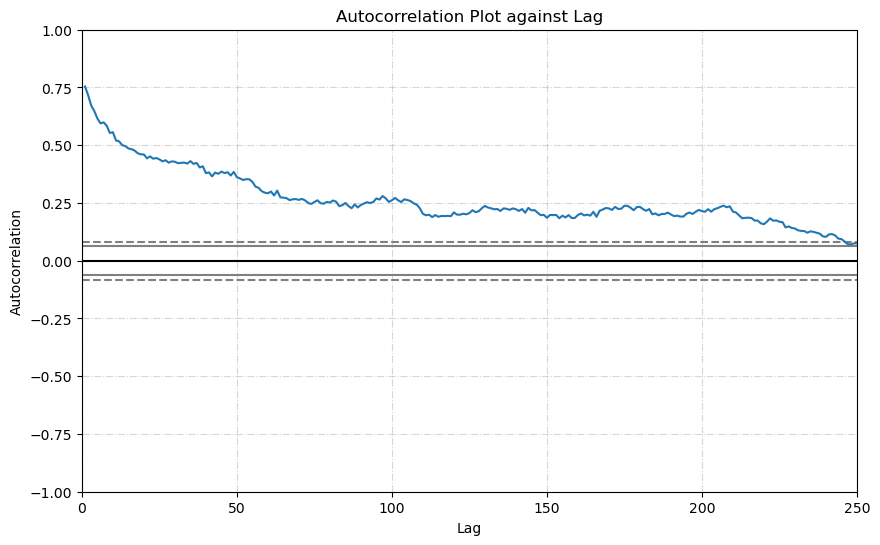

In [33]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df3['   Y'])
plt.title('Autocorrelation Plot against Lag')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True, alpha=0.5, linestyle='-.')
plt.xlim(0, 250)
plt.show()